# Image Preprocessing
https://www.mdpi.com/1424-8220/23/12/5589


# 1. Portralt Generation Module

1.1 Input Image

In [1]:
# import cv2
# from IPython.display import Image
# from matplotlib import pyplot as plt
# # monet2photo
# from os import listdir
# from numpy import asarray
# from numpy import vstack
# from keras.utils import img_to_array
# from keras.preprocessing.image import load_img
# # Read the input image 

# path = 'F:\\FRA503_IOT\\Portrait_Datasets\\'
# list_dir = listdir(path)

# for i in range (0,len(list_dir)):
#     img = cv2.imread(path + list_dir[i])
    
#     # Convert into grayscale 
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#     # Load the cascade 
#     face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt2.xml')  

#     # Detect faces 
#     faces = face_cascade.detectMultiScale(gray, 1.1, 4) 
#     # Draw rectangle around the faces and crop the faces 
#     for (x, y, w, h) in faces: 
#         # cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2) 
#         faces = img[y-100:y + h +20, x-20:x + w +20] 

#     resized_image = cv2.resize(faces, (256, 256))
#     cv2.imwrite('F:\\FRA503_IOT\\Preprocess_Datasets\\face_%s.jpg' % (str(i)), resized_image) 
 

# def show_rgb_image(image, title=None, conversion = cv2.COLOR_BGR2RGB):

#     # Converts from one colour space to the other. this is needed as RGB
#     # is not the default colour space for OpenCV
#     image = cv2.cvtColor(image, conversion)

#     # Show the image
#     plt.imshow(image)

#     # remove the axis / ticks for a clean looking image
#     plt.xticks([])
#     plt.yticks([])

#     # if a title is provided, show it
#     if title is not None:
#         plt.title(title)

#     plt.show()

# faces = cv2.imread('face.jpg')
# show_rgb_image(faces, 'Face', cv2.COLOR_BGR2RGB)

In [2]:
import cv2
from IPython.display import Image
from matplotlib import pyplot as plt
# monet2photo
from os import listdir
from numpy import asarray
from numpy import vstack
from PIL import Image

# Read the input image 

path = 'F:\\FRA503_IOT\\Preprocess_Portrait_Dataset\\'
list_dir = listdir(path)
for i in range (0,len(list_dir)):
    original_img = Image.open(path + list_dir[i])
    horz_img = original_img.transpose(method=Image.FLIP_LEFT_RIGHT)

    horz_img.save('F:\\FRA503_IOT\\Preprocess_Portrait_Dataset\\Draw_%s_filp.jpg' % (str(i))) 

1.2 Yolo face detection

In [1]:
# import libraries
from yoloface import face_analysis
import numpy
import cv2
from os import listdir
from matplotlib import pyplot as plt
face=face_analysis() 
       #  Auto Download a large weight files from Google Drive.
                            #  only first time.
                            #  Automatically  create folder .yoloface on cwd.
# example 1
path = 'F:\\FRA503_IOT\\Portrait_Datasets\\'
list_dir = listdir(path)
# name = 'Screenshot 2023-10-22 154743.jpg'


for i in range (0,len(list_dir)):
    
    img,box,conf=face.face_detection(image_path= path + list_dir[i] ,model='tiny')

    for (x, y, w, h) in box:
        # faces = img[y-100:y + h +20, x-20:x + w +20] 
        faces = img[y:y + w, x-50:x + h+50]

    print(box)                  # box[i]=[x,y,w,h]
    print(conf)                 #  value between(0 - 1)  or probability
    print(faces)
    # face.show_output(img,box)
    if len(faces) != 0:
        resized_image = cv2.resize(faces, (256, 256))

        def show_rgb_image(image, title=None, conversion = cv2.COLOR_BGR2RGB):

            # Converts from one colour space to the other. this is needed as RGB
            # is not the default colour space for OpenCV
            image = cv2.cvtColor(image, conversion)

            # Show the image
            plt.imshow(image)

            # remove the axis / ticks for a clean looking image
            plt.xticks([])
            plt.yticks([])

            # if a title is provided, show it
            if title is not None:
                plt.title(title)

            plt.show()

        # print(faces)
        # show_rgb_image(resized_image, 'Face', cv2.COLOR_BGR2RGB)
        cv2.imwrite('F:\\FRA503_IOT\\Preprocess_Datasets\\face_%s.jpg' % (str(i)), resized_image) 

yolov3-tiny_face.weights:: status : file already exists
yolov3_tiny_face.cfg:: status : file already exists
face_detection.weights:: status : file already exists
face_detection.cfg:: status : file already exists
[[95, 76, 403, 276]]
[0.9999524354934692]
[[[ 30  36  47]
  [ 34  39  48]
  [ 37  43  54]
  ...
  [  2   0   9]
  [  0   0   8]
  [  0   0   8]]

 [[ 27  34  43]
  [ 30  35  44]
  [ 33  39  50]
  ...
  [  5   0  10]
  [  2   0   9]
  [  0   0   9]]

 [[ 28  35  44]
  [ 30  35  44]
  [ 31  37  48]
  ...
  [  6   0  12]
  [  3   0  11]
  [  2   0  12]]

 ...

 [[  5  33  50]
  [ 18  44  61]
  [ 26  52  69]
  ...
  [ 25  64 108]
  [ 24  64 106]
  [ 20  63 102]]

 [[  0  26  42]
  [  9  35  51]
  [ 19  45  61]
  ...
  [ 22  60 102]
  [ 22  63 102]
  [ 21  64 103]]

 [[  2  28  42]
  [  0  26  40]
  [  7  33  47]
  ...
  [ 15  53  95]
  [ 18  59  98]
  [ 19  62 101]]]
[[140, 88, 408, 255]]
[0.9998592138290405]
[[[206 200 189]
  [206 200 189]
  [206 199 190]
  ...
  [198 196 185]
  [

In [12]:
list_dir[0]

'417542787_263141183258035_7091292373076135971_n.jpg'

# 2. Sketch Generation Module

way1: turn image to grey and modify the image by sharpening the edges

In [456]:
import cv2

name = 'Derek'
image = cv2.imread('C:\\git\\FRA_503-IOT\\Nodejs\\Processed_image\\'+name+'step1.png')
# convert an image from one color space to another
grey_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
invert = cv2.bitwise_not(grey_img)  # helps in masking of the image
# sharp edges in images are smoothed while minimizing too much blurring
blur = cv2.GaussianBlur(invert, (25, 25), 0)
invertedblur = cv2.bitwise_not(blur)
sketch = cv2.divide(grey_img, invertedblur, scale=256.0)
cv2.imwrite("sketch.png", sketch)  # converted image is saved as mentioned name
cv2.imshow('Sketch pic', sketch)
cv2.waitKey(0)        
 
# # Destroying present windows on screen
cv2.destroyAllWindows() 


way2: Load Model

1/1 [==============================] - 2s 2s/step


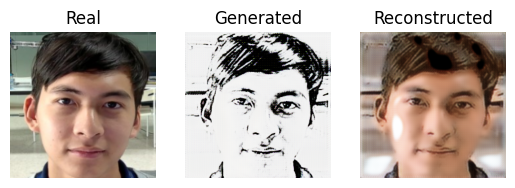

In [457]:
import cv2
from IPython.display import Image
from matplotlib import pyplot as plt
import matplotlib.image
from os import listdir
from numpy import asarray
from numpy import vstack
from keras.utils import img_to_array
from keras.utils import load_img
from sklearn.utils import resample
from instancenormalization import InstanceNormalization
from PIL import Image
from keras.models import load_model
from matplotlib import pyplot
from numpy.random import randint

# select a random sample of images from the dataset
def select_sample(dataset):
	X = dataset[0]
	return X.reshape(1, 256, 256, 3)

# plot the image, its translation, and the reconstruction
def show_plot(imagesX, imagesY1, imagesY2):
	# cv2.imwrite("Generate_Portrait.png", imagesY1)
	images = vstack((imagesX, imagesY1, imagesY2))
	titles = ['Real', 'Generated', 'Reconstructed']
	# scale from [-1,1] to [0,1]
	images = (images + 1) / 2.0
	# plot images row by row
	for i in range(len(images)):
		# define subplot
		pyplot.subplot(1, len(images), 1 + i)
		# turn off axis
		pyplot.axis('off')
		# plot raw pixel data
		pyplot.imshow(images[i])

		matplotlib.image.imsave('Genearated_Portrait.png', images[1])
		# title
		pyplot.title(titles[i])
	pyplot.show()

def load_images(path, size=(256,256)):
    data_list = list()
    pixels = load_img(path, target_size=size)
    pixels = img_to_array(pixels)
    data_list.append(pixels)
    return asarray(data_list)


dataB_all = load_images('C:\\git\\FRA_503-IOT\\Nodejs\\Processed_image\\'+name+'step1.png')
B_data = (dataB_all - 127.5) / 127.5


# load the models
cust = {'InstanceNormalization': InstanceNormalization}
model_AtoB = load_model('g_model_BtoA_003750.h5', cust) # 3750
model_BtoA = load_model('g_model_AtoB_003750.h5', cust)

B_real = select_sample(B_data)
A_generated  = model_BtoA.predict(B_real)
B_reconstructed = model_AtoB.predict(A_generated)
show_plot(B_real, A_generated, B_reconstructed)

# 3. Drawing Motion Generation Module

3.1 Skeleton Extraction

The opening algorithm is primarily used to extract the majority of the sketch lines. This algorithm involves performing erosion followed by dilation, which helps to smooth pixel edges and eliminate isolated pixels. This step significantly simplifies the sketch structure and allows for better feature extraction in the subsequent steps. 

On the other hand, the closing algorithm is primarily employed to improve the accuracy of the system for eye sketches. This algorithm involves performing dilation followed by erosion, which fills small holes and provides better details. This step helps to produce more natural-looking portraits.

Morphological Transformations technics https://medium.com/analytics-vidhya/morphological-transformations-of-images-using-opencv-image-processing-part-2-f64b14af2a38

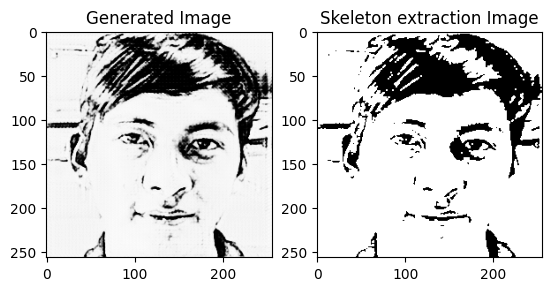

In [466]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image

# img = cv2.imread("sketch.png",0)

img = cv2.imread("Genearated_Portrait.png",0)


# binarize the image 
binr = cv2.threshold(img, 0, 255, 
                     cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1] 

# define the kernel 
kernel = np.ones((2,2), np.uint8)

erosion = cv2.erode(binr,kernel,iterations=1) 

gradient = cv2.morphologyEx(binr, cv2.MORPH_GRADIENT ,kernel)
  
# opening the image 
opening = cv2.morphologyEx(binr, cv2.MORPH_OPEN, 
                           kernel, iterations=1) 

# opening the image 
open_n_closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel, iterations=1) 


# print the output 
plt.subplot(121),plt.imshow(img, cmap='gray'),plt.title('Generated Image')
plt.subplot(122),plt.imshow(opening, cmap='gray'),plt.title('Skeleton extraction Image')

matplotlib.image.imsave('Skeleton_Extraction.png', opening)


3.2 Line Extraction

The pixel-to-pixel Algorithm 1 was employed prior to extracting lines from a sketch image. This analysis was conducted on a down-sampled version of the cropped image, where the width was reduced to 400 pixels. This technique entails a search for the nearest pixel to the current pixel and appending it to a line array if it is connected. Pixels that are not connected are saved to a new line array. The pixel-to-pixel algorithm is highly effective and accurate when it comes to extracting lines from sketches, enabling their further processing in the system.

Example for contour detection
https://learnopencv.com/contour-detection-using-opencv-python-c/

(<Axes: title={'center': 'Line_extraction Image'}>,
 Text(0.5, 1.0, 'Line_extraction Image'))

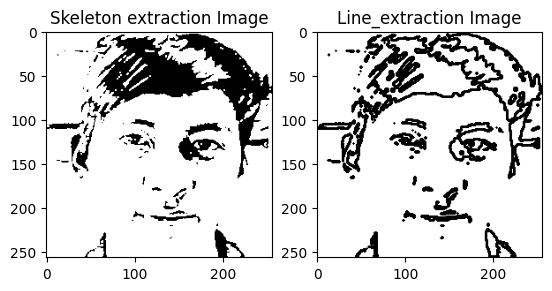

In [467]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('Skeleton_Extraction.png')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply a threshold to create a binary image separating lines from the background
_, binary_image = cv2.threshold(gray_image, 200, 255, cv2.THRESH_BINARY)  # ThresholdValue: Value of Threshold below and above which pixel values will change accordingly

# Find contours (lines) in the binary image
contours, _ = cv2.findContours(255-binary_image, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_SIMPLE)

# Draw the detected lines on a blank canvas
line_image = np.zeros_like(image)

for contour in contours:
    # Draw the contours (lines) found onto the blank canvas
    cv2.drawContours(line_image, [contour], contourIdx=-1, color=(255, 255, 255), thickness=2)

cv2.imwrite("line_extraction.png", 255-line_image)

# Display the original image and the extracted lines
plt.subplot(121),plt.imshow(gray_image, cmap='gray'),plt.title('Skeleton extraction Image')
plt.subplot(122),plt.imshow(255-line_image, cmap='gray'),plt.title('Line_extraction Image')

In [444]:
len(contours)

144

# Way Point Generator and UR control

Use variable 'contours' from previous step

In [9]:
points = []
i = 1
num_of_contour = len(contours)
for contour in contours:
    for point in contour:
        points.append(np.append(point[0],i))  # Append the points of the contour
    i = i+1

In [10]:
# points

In [11]:
points = np.asarray(points)  # [X, Y, numofcontour] in picture frame tran to [Y-257, X+196] in robot frame
points

array([[131, 254,   1],
       [131, 255,   1],
       [133, 255,   1],
       ...,
       [100, 134,  42],
       [ 99, 134,  42],
       [ 98, 133,  42]])

In [12]:
array_to_ur = np.ndarray(shape= points.shape)
array_to_ur[:,0] = (points[:,1] - 257) * 1e-3
array_to_ur[:,1] =  (np.round((points[:,0] * 0.82),0) + 196) * 1e-3
array_to_ur[:,2] = points[:,2]

In [13]:
array_to_ur.shape

(1129, 3)

In [14]:
array_to_ur[:,2]

array([ 1.,  1.,  1., ..., 42., 42., 42.])

In [15]:
import rtde_control
rtde_c = rtde_control.RTDEControlInterface("192.168.20.35")
z_axis = 0.208 #small magic pen
home_pose = [-0.129, 0.3, 0.252, 3.151, 0, 0]
rtde_c.moveJ_IK(home_pose, 0.5, 0.3)
step = 1
for i in range(array_to_ur.shape[0]):
    # if array_to_ur[:,2][i] <= 2:
    if step != array_to_ur[:,2][i]:
        target_pose = [array_to_ur[:,0][i-1], array_to_ur[:,1][i-1], z_axis + 0.03 , 3.151, 0, 0]
        print('step: ', array_to_ur[:,2][i] , target_pose)
        rtde_c.moveJ_IK(target_pose, 1.0, 0.1)

        target_pose = [array_to_ur[:,0][i], array_to_ur[:,1][i], z_axis + 0.03 , 3.151, 0, 0]
        print('step: ', array_to_ur[:,2][i] , target_pose)
        rtde_c.moveJ_IK(target_pose, 1.0, 0.1)

        target_pose = [array_to_ur[:,0][i], array_to_ur[:,1][i], z_axis, 3.151, 0, 0]
        print('step: ', array_to_ur[:,2][i] , target_pose)
        rtde_c.moveJ_IK(target_pose, 1.0, 0.1)

        step = array_to_ur[:,2][i]
    else:
        target_pose = [array_to_ur[:,0][i], array_to_ur[:,1][i], z_axis, 3.151, 0, 0]
        print(target_pose)
        rtde_c.moveJ_IK(target_pose, 1.0, 0.1)
rtde_c.moveJ_IK(home_pose, 0.5, 0.3)
rtde_c.disconnect()

[-0.003, 0.303, 0.208, 3.151, 0, 0]
[-0.002, 0.303, 0.208, 3.151, 0, 0]
[-0.002, 0.305, 0.208, 3.151, 0, 0]
[-0.003, 0.305, 0.208, 3.151, 0, 0]
step:  2.0 [-0.003, 0.305, 0.238, 3.151, 0, 0]
step:  2.0 [-0.017, 0.248, 0.238, 3.151, 0, 0]
step:  2.0 [-0.017, 0.248, 0.208, 3.151, 0, 0]
[-0.013000000000000001, 0.248, 0.208, 3.151, 0, 0]
[-0.012, 0.247, 0.208, 3.151, 0, 0]
[-0.003, 0.247, 0.208, 3.151, 0, 0]
[-0.002, 0.248, 0.208, 3.151, 0, 0]
[-0.002, 0.255, 0.208, 3.151, 0, 0]
[-0.002, 0.252, 0.208, 3.151, 0, 0]
[-0.003, 0.251, 0.208, 3.151, 0, 0]
[-0.004, 0.251, 0.208, 3.151, 0, 0]
[-0.005, 0.25, 0.208, 3.151, 0, 0]
[-0.006, 0.25, 0.208, 3.151, 0, 0]
[-0.007, 0.249, 0.208, 3.151, 0, 0]
[-0.01, 0.249, 0.208, 3.151, 0, 0]
[-0.011, 0.248, 0.208, 3.151, 0, 0]
[-0.017, 0.248, 0.208, 3.151, 0, 0]
step:  3.0 [-0.017, 0.248, 0.238, 3.151, 0, 0]
step:  3.0 [-0.019, 0.308, 0.238, 3.151, 0, 0]
step:  3.0 [-0.019, 0.308, 0.208, 3.151, 0, 0]
[-0.017, 0.308, 0.208, 3.151, 0, 0]
[-0.017, 0.309, 0.208,

In [16]:
# import rtde_control
# rtde_c = rtde_control.RTDEControlInterface("192.168.20.35")
# home_pose = [-0.129, 0.3, 0.252, 3.151, 0, 0]
# rtde_c.moveJ_IK(home_pose, 0.5, 0.3)
# rtde_c.disconnect()